# Imports

In [1]:
using DataFrames
using CSV
using MLJ
using Flux
using Plots
using StatsBase
using MLJ: confusion_matrix

include("../../lib.jl")

ENV["LINES"]=30;

In [2]:
mkdir("./Figures")

LoadError: IOError: mkdir: file already exists (EEXIST)

# Datasets

In [3]:
df = CSV.read("data.csv")

,Class,Instance,Nucleotide_Sequence
,String,String,String
1,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG
2,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC
3,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG
4,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTTGCTCGGTTTTCCCC
5,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCCCGGCCCTTGACCCT
6,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTAAGAGAGGGCCAAGCTCAGAGACCACAG
7,EI,CHPIGECA-DONOR-903,CCTTTGAGGACAGCACCAAGAAGTGTGCAGGTACGTTCCCACCTGCCCTGGTGGCCGCCA
8,EI,CHPIGECA-DONOR-1313,CCCTCGTGCGGTCCACGACCAAGACCAGCGGTGAGCCACGGGCAGGCCGGGGTCGTGGGG
9,EI,GCRHBBA1-DONOR-1260,TGGCGACTACGGCGCGGAGGCCCTGGAGAGGTGAGGACCCTCCTGTCCCTGCTCCAGTCC


In [4]:
data = separate_bases(df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,67.0,67.0,65.0,71.0,67.0,84.0,71.0,67.0,65.0
2,65.0,71.0,65.0,67.0,67.0,67.0,71.0,67.0,67.0
3,71.0,65.0,71.0,71.0,84.0,71.0,65.0,65.0,71.0
4,71.0,71.0,71.0,67.0,84.0,71.0,67.0,71.0,84.0
5,71.0,67.0,84.0,67.0,65.0,71.0,67.0,67.0,67.0
6,67.0,65.0,71.0,65.0,67.0,84.0,71.0,71.0,71.0
7,67.0,67.0,84.0,84.0,84.0,71.0,65.0,71.0,71.0
8,67.0,67.0,67.0,84.0,67.0,71.0,84.0,71.0,67.0
9,84.0,71.0,71.0,67.0,71.0,65.0,67.0,84.0,65.0


In [5]:
data = hcat(df,data)

,Class,Instance,Nucleotide_Sequence
,String,String,String
1,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG
2,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC
3,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG
4,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTTGCTCGGTTTTCCCC
5,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCCCGGCCCTTGACCCT
6,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTAAGAGAGGGCCAAGCTCAGAGACCACAG
7,EI,CHPIGECA-DONOR-903,CCTTTGAGGACAGCACCAAGAAGTGTGCAGGTACGTTCCCACCTGCCCTGGTGGCCGCCA
8,EI,CHPIGECA-DONOR-1313,CCCTCGTGCGGTCCACGACCAAGACCAGCGGTGAGCCACGGGCAGGCCGGGGTCGTGGGG
9,EI,GCRHBBA1-DONOR-1260,TGGCGACTACGGCGCGGAGGCCCTGGAGAGGTGAGGACCCTCCTGTCCCTGCTCCAGTCC


In [6]:
data = data[:, Not(2:3)]

,Class,x1,x2,x3,x4,x5,x6,x7,x8
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,EI,67.0,67.0,65.0,71.0,67.0,84.0,71.0,67.0
2,EI,65.0,71.0,65.0,67.0,67.0,67.0,71.0,67.0
3,EI,71.0,65.0,71.0,71.0,84.0,71.0,65.0,65.0
4,EI,71.0,71.0,71.0,67.0,84.0,71.0,67.0,71.0
5,EI,71.0,67.0,84.0,67.0,65.0,71.0,67.0,67.0
6,EI,67.0,65.0,71.0,65.0,67.0,84.0,71.0,71.0
7,EI,67.0,67.0,84.0,84.0,84.0,71.0,65.0,71.0
8,EI,67.0,67.0,67.0,84.0,67.0,71.0,84.0,71.0
9,EI,84.0,71.0,71.0,67.0,71.0,65.0,67.0,84.0


Look at class labels to see if dataset is imbalanced

In [7]:
label_counts = countmap(data[:Class])

Dict{String,Int64} with 3 entries:
  "IE" => 768
  "EI" => 767
  "N"  => 1655

In [8]:
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

3-element Array{Float64,1}:
 0.24075235109717869
 0.24043887147335424
 0.5188087774294671

Get data ready for training

In [9]:
coerce!(data, :Class=>Multiclass,
              :Left_Weight=>Continuous,
              :Right_Weight=>Continuous,
              :Left_Distance=>Continuous,
              :Right_Distance=>Continuous)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ Class   │ CategoricalValue{String,UInt32} │ Multiclass{3} │
│ x1      │ Float64                         │ Continuous    │
│ x2      │ Float64                         │ Continuous    │
│ x3      │ Float64                         │ Continuous    │
│ x4      │ Float64                         │ Continuous    │
│ x5      │ Float64                         │ Continuous    │
│ x6      │ Float64                         │ Continuous    │
│ x7      │ Float64                         │ Continuous    │
│ x8      │ Float64                         │ Continuous    │
│ x9      │ Float64                         │ Continuous    │
│ x10     │ Float64                         │ Continuous    │
│ x11     │ Float64                         │ Continuous    │
│ x12     │ Float64                         │ Continuous    │
│ x13   

In [10]:
y, X = unpack(data, ==(:Class), colname->true)

(CategoricalValue{String,UInt32}["EI", "EI", "EI", "EI", "EI", "EI", "EI", "EI", "EI", "EI"  …  "N", "N", "N", "N", "N", "N", "N", "N", "N", "N"], 3190×60 DataFrame. Omitted printing of 53 columns
│ Row  │ x1      │ x2      │ x3      │ x4      │ x5      │ x6      │ x7      │
│      │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├──────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1    │ 67.0    │ 67.0    │ 65.0    │ 71.0    │ 67.0    │ 84.0    │ 71.0    │
│ 2    │ 65.0    │ 71.0    │ 65.0    │ 67.0    │ 67.0    │ 67.0    │ 71.0    │
│ 3    │ 71.0    │ 65.0    │ 71.0    │ 71.0    │ 84.0    │ 71.0    │ 65.0    │
│ 4    │ 71.0    │ 71.0    │ 71.0    │ 67.0    │ 84.0    │ 71.0    │ 67.0    │
│ 5    │ 71.0    │ 67.0    │ 84.0    │ 67.0    │ 65.0    │ 71.0    │ 67.0    │
│ 6    │ 67.0    │ 65.0    │ 71.0    │ 65.0    │ 67.0    │ 84.0    │ 71.0    │
│ 7    │ 67.0    │ 67.0    │ 84.0    │ 84.0    │ 84.0    │ 71.0    │ 65.0    │
│ 8    │ 67.0

Partition train and test data accoring to class labels

In [11]:
# data to use when trying to fit a single validation set
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=123, stratify=values(data[:Class])) # gives 70:30 split

([1400, 2606, 502, 1046, 1411, 2710, 1131, 2546, 2422, 33  …  3151, 112, 1864, 1420, 840, 2792, 1321, 3178, 1327, 261], [2095, 1056, 93, 1565, 1177, 3036, 1315, 511, 1410, 2319  …  805, 1158, 1750, 2548, 1704, 2850, 1646, 1595, 2707, 415])

In [12]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

3-element Array{Float64,1}:
 0.24093148231079264
 0.5185848634124496
 0.24048365427675772

In [13]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

3-element Array{Float64,1}:
 0.24033437826541273
 0.5193312434691745
 0.24033437826541273

# Five Learning Algorithms

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors


##### Testing
* Implement the algorithms
* Design two *interesting* classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples.

In [14]:
models(matching(X,y))

42-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BaggingClassifier, package_name = ScikitLearn, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )
 (name = BayesianLDA, package_name = ScikitLearn, ... )
 (name = BayesianQDA, package_name = ScikitLearn, ... )
 (name = BayesianSubspaceLDA, package_name = MultivariateStats, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_na

In [15]:
@load NeuralNetworkClassifier verbosity=2

import MLJFlux 

┌ Info: Loading into module "Main": 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/mUBFt/src/loading.jl:70


✔
import MLJFlux ✔


NeuralNetworkClassifier(
    builder = Short(
            n_hidden = 0,
            dropout = 0.5,
            σ = NNlib.σ),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @197

## Neural networks
* Use favorite kind of network and training algorithm. 
* You may use networks of nodes with as many layers as you like and any activation function you see fit.

1. https://github.com/alan-turing-institute/MLJFlux.jl/blob/master/examples/boston.ipynb
1. https://github.com/alan-turing-institute/MLJFlux.jl
1. https://alan-turing-institute.github.io/MLJ.jl/dev/transformers/

In [16]:
# Define a custom network
mutable struct CustomNN <:MLJFlux.Builder
    n1 ::Int
end

In [17]:
function MLJFlux.build(nn::CustomNN, n_in, n_out)
    return Chain(
        Flux.Dense(n_in, nn.n1, σ),
#         Flux.Dense(nn.n1, nn.n2, σ),
        Flux.Dense(nn.n1, n_out, σ),
    )
end

In [18]:
layer1 = 80

80

In [19]:
batch_sz = 16;

In [20]:
max_epochs = 2000;

### No-preprocessing

In [21]:
nn = NeuralNetworkClassifier(builder=CustomNN(layer1))

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 80),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @484

In [22]:
Net = machine(nn, X, y)

Machine{NeuralNetworkClassifier{CustomNN,…}} @371 trained 0 times.
  args: 
    1:	Source @779 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @957 ⏎ `AbstractArray{Multiclass{3},1}`


In [23]:
nn.optimiser.eta = 0.001
nn.epochs = 60
nn.batch_size = batch_sz
nn.lambda = 0.01

0.01

In [24]:
fit!(Net, rows=train, verbosity=2)

┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @371.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Loss is 1.026
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.027
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.027
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.027
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.027
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.027
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.027
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.027
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.027
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.027
└ @ MLJ

Machine{NeuralNetworkClassifier{CustomNN,…}} @371 trained 1 time.
  args: 
    1:	Source @779 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @957 ⏎ `AbstractArray{Multiclass{3},1}`


In [25]:
nn.optimiser.eta = nn.optimiser.eta / 3
nn.epochs = nn.epochs + 40

100

In [26]:
fit!(Net, rows=train, verbosity=2)

┌ Info: Updating Machine{NeuralNetworkClassifier{CustomNN,…}} @371.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:320
┌ Info: Loss is 1.026
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.025
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.025
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.024
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.024
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.023
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.022
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.021
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.02
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 1.019
└ @ MLJF

Machine{NeuralNetworkClassifier{CustomNN,…}} @371 trained 2 times.
  args: 
    1:	Source @779 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @957 ⏎ `AbstractArray{Multiclass{3},1}`


In [27]:
nn_acc = evaluate!(Net, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:44


┌───────────────┬───────────────┬──────────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                       │
├───────────────┼───────────────┼──────────────────────────────────────────────────┤
│ cross_entropy │ 0.859         │ Float32[0.81, 0.833, 0.961, 0.832, 0.819, 0.899] │
│ acc           │ 0.674         │ [0.733, 0.705, 0.515, 0.72, 0.74, 0.629]         │
└───────────────┴───────────────┴──────────────────────────────────────────────────┘
_.per_observation = [[[0.611, 1.4, ..., 1.3], [0.753, 0.662, ..., 0.834], [1.06, 1.13, ..., 0.779], [0.908, 0.892, ..., 0.687], [0.81, 0.904, ..., 0.594], [0.655, 0.731, ..., 0.65]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [28]:
fitted_params(Net)

(chain = Chain(Chain(Dense(60, 80, σ), Dense(80, 3, σ)), softmax),)

In [29]:
report(Net)

(training_losses = Any[1.025665f0, 1.0245535f0, 1.022656f0, 1.0209365f0, 1.0205262f0, 1.0194746f0, 1.0183444f0, 1.0171202f0, 1.016011f0, 1.0144023f0  …  0.89424336f0, 0.8933239f0, 0.8917813f0, 0.89098024f0, 0.89021176f0, 0.88940656f0, 0.88859487f0, 0.88778657f0, 0.8870058f0, 0.8862951f0],)

### With Preprocessing

Standardizing Inputs makes a huge difference.
Before, I could only barely break below 0.4 training loss, but by standardizing inputs, I can easily get near 0.3.

In [30]:
standardizer = Standardizer()
stand = machine(standardizer, X[train,:]) #only want to standardize on training distribution
fit!(stand)
X_stand = MLJ.transform(stand, X);

┌ Info: Training Machine{Standardizer} @802.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


In [31]:
Net = machine(nn, X_stand, y)

Machine{NeuralNetworkClassifier{CustomNN,…}} @482 trained 0 times.
  args: 
    1:	Source @497 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @181 ⏎ `AbstractArray{Multiclass{3},1}`


### Learning Curve

In [32]:
Net.model.epochs = max_epochs
fit!(Net, rows=train, verbosity=1, force=true)

┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @482.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Optimising neural net:100%[=========================] Time: 0:03:38


Machine{NeuralNetworkClassifier{CustomNN,…}} @482 trained 1 time.
  args: 
    1:	Source @497 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @181 ⏎ `AbstractArray{Multiclass{3},1}`


In [33]:
nn_acc = evaluate!(Net, resampling=Holdout(), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:25:13


┌───────────────┬───────────────┬─────────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                      │
├───────────────┼───────────────┼─────────────────────────────────────────────────┤
│ cross_entropy │ 0.652         │ Float32[0.656, 0.669, 0.67, 0.63, 0.648, 0.637] │
│ acc           │ 0.903         │ [0.9, 0.889, 0.878, 0.925, 0.91, 0.915]         │
└───────────────┴───────────────┴─────────────────────────────────────────────────┘
_.per_observation = [[[1.55, 0.551, ..., 0.551], [0.551, 0.551, ..., 0.718], [0.551, 0.604, ..., 0.862], [0.551, 0.551, ..., 0.763], [0.551, 0.551, ..., 1.55], [0.551, 0.551, ..., 0.551]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [34]:
vals = collect(0:5:max_epochs)
r = range(nn, :epochs, lower=1, upper=max_epochs, scale=:log10)

MLJBase.NumericRange(Int64, :epochs, ... )

In [35]:
curve = MLJ.learning_curve(Net, 
                        range=r, 
                        resampling=Holdout(fraction_train=0.7), 
#                         resampling=CV(nfolds=4), 
                        measure=cross_entropy, 
                        acceleration=CPUProcesses()
)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @040.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 28 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 28 metamodels: 100%[=========================] Time: 0:03:30


(parameter_name = "epochs",
 parameter_scale = :log10,
 parameter_values = [1, 2, 3, 4, 6, 7, 10, 13, 17, 23  …  305, 406, 540, 719, 957, 1274, 1696, 2258, 3005, 4000],
 measurements = [1.1457148790359497, 1.174164056777954, 1.1891300678253174, 1.1972969770431519, 1.1465098857879639, 1.1590325832366943, 1.0570790767669678, 0.9956395030021667, 0.944101095199585, 0.9049282670021057  …  0.7744516134262085, 0.744830846786499, 0.7132919430732727, 0.7045815587043762, 0.7079898118972778, 0.7160536050796509, 0.7273118495941162, 0.7277708053588867, 0.7319011688232422, 0.7342081665992737],)

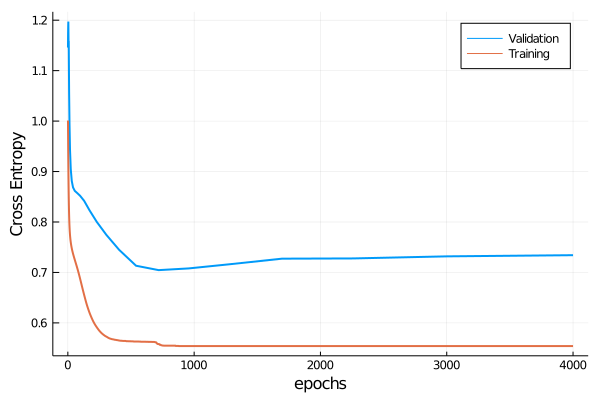

In [36]:
plot(curve.parameter_values,
     curve.measurements,
     xlab=curve.parameter_name,
     ylab="Cross Entropy",
     label="Validation", lw=2)
plot!(Net.report.training_losses, label="Training", lw=2)

In [37]:
a = round(nn.optimiser.eta, digits=5)
b = round(minimum(curve.measurements), digits=5)
best_epochs = curve.parameter_values[argmin(curve.measurements)]
a,b, best_epochs

(0.00033, 0.70458, 719)

In [39]:
fn = "Figures/LearningCurve_NN_hidden:$(layer1)_epochs:$(nn.epochs)_lr:$(a)_loss:$(b)_labmda:$(nn.lambda)"
png(replace(fn,'.' => ','))

### GridSearch for Hidden Layer Size 1

In [40]:
Net = machine(nn, X_stand, y)

Machine{NeuralNetworkClassifier{CustomNN,…}} @401 trained 0 times.
  args: 
    1:	Source @906 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @509 ⏎ `AbstractArray{Multiclass{3},1}`


In [41]:
param1 = :epochs
param2 = :(builder.n1)

r1 = range(nn, param1, lower=10, upper=4000, scale=:log10)
# r1 = range(nn, param1, lower=1, upper=100, scale=:linear)
r2 = range(nn, param2, lower=10, upper=100, scale=:linear)

MLJBase.NumericRange(Int64, :(builder.n1), ... )

In [42]:
self_tuning_nn_model = TunedModel(model=nn,
                                    tuning=Grid(goal=64),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

ProbabilisticTunedModel(
    model = NeuralNetworkClassifier(
            builder = CustomNN @784,
            finaliser = NNlib.softmax,
            optimiser = ADAM(0.0003333333333333333, (0.9, 0.999), IdDict{Any,Any}()),
            loss = Flux.crossentropy,
            epochs = 4000,
            batch_size = 16,
            lambda = 0.01,
            alpha = 0.0,
            optimiser_changes_trigger_retraining = false),
    tuning = Grid(
            goal = 64,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = Holdout(
            fraction_train = 0.7,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{Int64,MLJBase.Bounded,Symbol}[NumericRange{Int64,…} @460, NumericRange{Int64,…} @331],
    train_best = true,
    repeats = 1,
    

In [43]:
self_tuning_nn = machine(self_tuning_nn_model, X_stand, y)

Machine{ProbabilisticTunedModel{Grid,…}} @643 trained 0 times.
  args: 
    1:	Source @853 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @997 ⏎ `AbstractArray{Multiclass{3},1}`


In [44]:
z = fit!(self_tuning_nn, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @643.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 64 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 64 metamodels: 100%[=========================] Time: 0:29:33


Machine{ProbabilisticTunedModel{Grid,…}} @643 trained 1 time.
  args: 
    1:	Source @853 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @997 ⏎ `AbstractArray{Multiclass{3},1}`


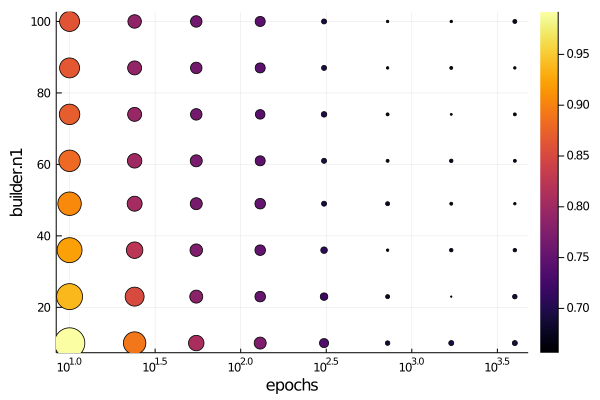

In [45]:
plot(self_tuning_nn)

In [46]:
best = fitted_params(self_tuning_nn)
best

(best_model = NeuralNetworkClassifier{CustomNN,…} @652,
 best_fitted_params = (chain = Chain(Chain(Dense(60, 23, σ), Dense(23, 3, σ)), softmax),),)

In [47]:
best.best_model

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 23),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.0003333333333333333, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 1700,
    batch_size = 16,
    lambda = 0.01,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @652

In [48]:
best_loss = z.report.best_result.measurement[1]

0.65637195f0

In [49]:
best_n1 = best.best_model.builder.n1

23

In [ ]:
fn = "Figures/Grid_NN_$(param1):$(best.best_model.epochs)_x_$(param2):$(best_n1)_bestloss:$(best_loss)"
f = replace(fn,'.' => ',')
png(f)

### GridSearch for Learning Rate

In [50]:
nn = NeuralNetworkClassifier(builder=CustomNN(best_n1))

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 23),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @237

In [51]:
nn.optimiser.eta = 0.001
nn.epochs = 60
nn.batch_size = batch_sz
nn.lambda = 0.01

0.01

In [52]:
Net = machine(nn, X_stand, y)

Machine{NeuralNetworkClassifier{CustomNN,…}} @234 trained 0 times.
  args: 
    1:	Source @740 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @338 ⏎ `AbstractArray{Multiclass{3},1}`


In [53]:
fit!(Net, rows=train, verbosity=1, force=true)

┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @234.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Optimising neural net:100%[=========================] Time: 0:00:02


Machine{NeuralNetworkClassifier{CustomNN,…}} @234 trained 1 time.
  args: 
    1:	Source @740 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @338 ⏎ `AbstractArray{Multiclass{3},1}`


In [54]:
param1 = :epochs
param2 = :(optimiser.eta)

r1 = range(nn, param1, lower=10, upper=4000, scale=:linear)
r2 = range(nn, param2, lower=0.0001, upper=0.1, scale=:log10)

MLJBase.NumericRange(Float64, :(optimiser.eta), ... )

In [55]:
self_tuning_nn_model = TunedModel(model=nn,
                                    tuning=Grid(goal=50),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

ProbabilisticTunedModel(
    model = NeuralNetworkClassifier(
            builder = CustomNN @861,
            finaliser = NNlib.softmax,
            optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
            loss = Flux.crossentropy,
            epochs = 60,
            batch_size = 16,
            lambda = 0.01,
            alpha = 0.0,
            optimiser_changes_trigger_retraining = false),
    tuning = Grid(
            goal = 50,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = Holdout(
            fraction_train = 0.7,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{T,MLJBase.Bounded,Symbol} where T[NumericRange{Int64,…} @308, NumericRange{Float64,…} @856],
    train_best = true,
    repeats = 1,
    n = nothing,

In [56]:
self_tuning_nn = machine(self_tuning_nn_model, X_stand, y)

Machine{ProbabilisticTunedModel{Grid,…}} @746 trained 0 times.
  args: 
    1:	Source @818 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @248 ⏎ `AbstractArray{Multiclass{3},1}`


In [57]:
z = fit!(self_tuning_nn, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @746.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 49 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 49 metamodels: 100%[=========================] Time: 0:31:17


Machine{ProbabilisticTunedModel{Grid,…}} @746 trained 1 time.
  args: 
    1:	Source @818 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @248 ⏎ `AbstractArray{Multiclass{3},1}`


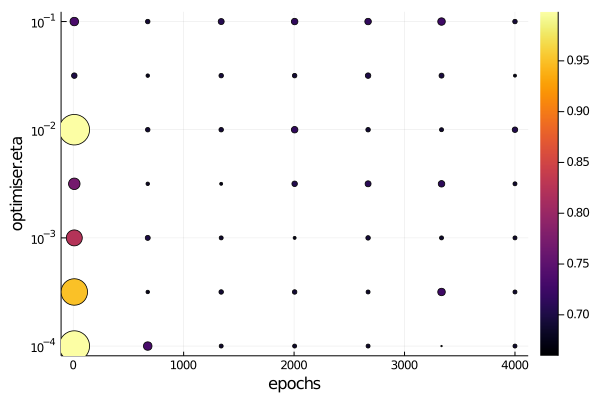

In [58]:
plot(self_tuning_nn)

In [59]:
best = fitted_params(self_tuning_nn)
best

(best_model = NeuralNetworkClassifier{CustomNN,…} @580,
 best_fitted_params = (chain = Chain(Chain(Dense(60, 23, σ), Dense(23, 3, σ)), softmax),),)

In [60]:
best.best_model

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 23),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.0001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 3335,
    batch_size = 16,
    lambda = 0.01,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @580

In [61]:
best_loss = z.report.best_result.measurement[1]

0.65967745f0

In [62]:
best_eta = round(best.best_model.optimiser.eta, digits=5)

0.0001

In [63]:
fn = "Figures/Grid_NN_$(param1):$(best.best_model.epochs)_x_$(param2):$(best_eta)_bestloss:$(best_loss)_hidden:$b"
png(replace(fn,'.' => ','))

### GridSearch for Regularization

In [64]:
nn = NeuralNetworkClassifier(builder=CustomNN(best_n1))

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 23),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @438

In [65]:
nn.optimiser.eta = best_eta
nn.epochs = 60
nn.batch_size = batch_sz
nn.lambda = 0.01

0.01

In [66]:
Net = machine(nn, X_stand, y)

Machine{NeuralNetworkClassifier{CustomNN,…}} @342 trained 0 times.
  args: 
    1:	Source @125 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @237 ⏎ `AbstractArray{Multiclass{3},1}`


In [67]:
param1 = :epochs
param2 = :lambda

r1 = range(nn, param1, lower=100, upper=4000, scale=:linear)
r2 = range(nn, param2, lower=0.0001, upper=10, scale=:log10)

MLJBase.NumericRange(Float64, :lambda, ... )

In [68]:
self_tuning_nn_model = TunedModel(model=nn,
                                    tuning=Grid(goal=50),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

ProbabilisticTunedModel(
    model = NeuralNetworkClassifier(
            builder = CustomNN @830,
            finaliser = NNlib.softmax,
            optimiser = ADAM(0.0001, (0.9, 0.999), IdDict{Any,Any}()),
            loss = Flux.crossentropy,
            epochs = 60,
            batch_size = 16,
            lambda = 0.01,
            alpha = 0.0,
            optimiser_changes_trigger_retraining = false),
    tuning = Grid(
            goal = 50,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = Holdout(
            fraction_train = 0.7,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{T,MLJBase.Bounded,Symbol} where T[NumericRange{Int64,…} @841, NumericRange{Float64,…} @334],
    train_best = true,
    repeats = 1,
    n = nothing

In [69]:
self_tuning_nn = machine(self_tuning_nn_model, X_stand, y)

Machine{ProbabilisticTunedModel{Grid,…}} @997 trained 0 times.
  args: 
    1:	Source @521 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @176 ⏎ `AbstractArray{Multiclass{3},1}`


In [70]:
z = fit!(self_tuning_nn, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @997.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 49 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 49 metamodels: 100%[=========================] Time: 0:45:19


Machine{ProbabilisticTunedModel{Grid,…}} @997 trained 1 time.
  args: 
    1:	Source @521 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @176 ⏎ `AbstractArray{Multiclass{3},1}`


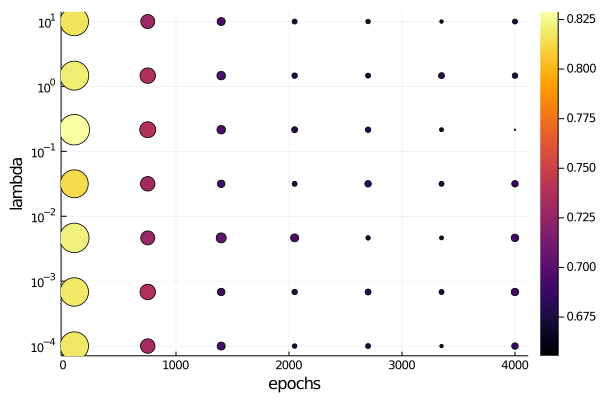

In [71]:
plot(self_tuning_nn)

In [72]:
best = fitted_params(self_tuning_nn)
best

(best_model = NeuralNetworkClassifier{CustomNN,…} @535,
 best_fitted_params = (chain = Chain(Chain(Dense(60, 23, σ), Dense(23, 3, σ)), softmax),),)

In [73]:
best.best_model

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 23),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.0001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 4000,
    batch_size = 16,
    lambda = 0.2154434690031884,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @535

In [74]:
best_loss = z.report.best_result.measurement[1]

0.6554763f0

In [75]:
best_lambda = best.best_model.lambda

0.2154434690031884

In [ ]:
fn = "Figures/Grid_NN_$(param1):$(best.best_model.epochs)_x_$(param2):$(best_lambda)_bestloss:$(best_loss)"
png(replace(fn,'.' => ','))

### Learning Curve

In [76]:
lc_model = NeuralNetworkClassifier(builder=CustomNN(best_n1))
lc_model.optimiser.eta = best_eta;
lc_model.lambda = best_lambda
lc_model.epochs = max_epochs
lc_model.batch_size = batch_sz
lc_model

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 23),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.0001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 4000,
    batch_size = 16,
    lambda = 0.2154434690031884,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @079

In [77]:
# lc_model = NeuralNetworkClassifier(builder=CustomNN(80,80))
# lc_model.optimiser.eta = 0.001;
# lc_model.lambda = best_lambda
# lc_model.epochs = 3000
# lc_model.batch_size = 8

In [78]:
mce(x,y) = mean(cross_entropy(x,y))

mce (generic function with 1 method)

In [81]:
data_schedule, training_losses, valid_losses = learn_curve(lc_model, X_stand[train,:], y[train], mce, step=100)

(d, train_metric, valid_metric) = (10, 0.56800455f0, 1.07058f0)
(d, train_metric, valid_metric) = (110, 0.5517435f0, 0.89052f0)
(d, train_metric, valid_metric) = (210, 0.5517334f0, 0.8429266f0)
(d, train_metric, valid_metric) = (310, 0.5620124f0, 0.82216394f0)
(d, train_metric, valid_metric) = (410, 0.5597838f0, 0.8166109f0)
(d, train_metric, valid_metric) = (510, 0.5717724f0, 0.7821689f0)
(d, train_metric, valid_metric) = (610, 0.56472325f0, 0.77008325f0)
(d, train_metric, valid_metric) = (710, 0.5598458f0, 0.75156516f0)
(d, train_metric, valid_metric) = (810, 0.5620308f0, 0.75378823f0)
(d, train_metric, valid_metric) = (910, 0.559169f0, 0.70712477f0)
(d, train_metric, valid_metric) = (1010, 0.5570234f0, 0.7185902f0)
(d, train_metric, valid_metric) = (1110, 0.5599323f0, 0.70051533f0)
(d, train_metric, valid_metric) = (1210, 0.5580578f0, 0.7100582f0)
(d, train_metric, valid_metric) = (1310, 0.55741924f0, 0.70797616f0)
(d, train_metric, valid_metric) = (1410, 0.5630212f0, 0.68539536f0)


(10:100:1710, Any[0.56800455f0, 0.5517435f0, 0.5517334f0, 0.5620124f0, 0.5597838f0, 0.5717724f0, 0.56472325f0, 0.5598458f0, 0.5620308f0, 0.559169f0, 0.5570234f0, 0.5599323f0, 0.5580578f0, 0.55741924f0, 0.5630212f0, 0.5628181f0, 0.56411654f0, 0.5662418f0], Any[1.07058f0, 0.89052f0, 0.8429266f0, 0.82216394f0, 0.8166109f0, 0.7821689f0, 0.77008325f0, 0.75156516f0, 0.75378823f0, 0.70712477f0, 0.7185902f0, 0.70051533f0, 0.7100582f0, 0.70797616f0, 0.68539536f0, 0.6706758f0, 0.6800614f0, 0.67116886f0])

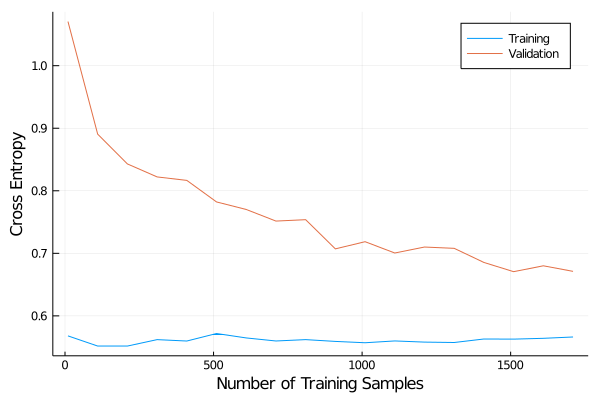

In [82]:
plot(data_schedule, training_losses, label="Training")
plot!(data_schedule, valid_losses, label="Validation")
xlabel!("Number of Training Samples")
ylabel!("Cross Entropy")

In [83]:
png("Figures/loss_curve_NN")

#### Learning Curve

In [84]:
Net = machine(lc_model, X_stand, y)
Net.model.epochs = max_epochs
fit!(Net, rows=train, verbosity=1, force=true)

┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @263.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Optimising neural net:100%[=========================] Time: 0:02:51


Machine{NeuralNetworkClassifier{CustomNN,…}} @263 trained 1 time.
  args: 
    1:	Source @611 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @409 ⏎ `AbstractArray{Multiclass{3},1}`


In [85]:
nn_acc = evaluate!(Net, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:18:55


┌───────────────┬───────────────┬──────────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                       │
├───────────────┼───────────────┼──────────────────────────────────────────────────┤
│ cross_entropy │ 0.66          │ Float32[0.657, 0.659, 0.651, 0.658, 0.668, 0.67] │
│ acc           │ 0.889         │ [0.878, 0.893, 0.914, 0.882, 0.881, 0.885]       │
└───────────────┴───────────────┴──────────────────────────────────────────────────┘
_.per_observation = [[[0.551, 0.563, ..., 0.574], [0.551, 1.43, ..., 1.48], [0.552, 1.25, ..., 0.551], [0.552, 0.552, ..., 0.551], [0.551, 0.551, ..., 0.552], [0.551, 1.55, ..., 0.551]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [86]:
r = range(nn, :epochs, lower=1, upper=max_epochs, scale=:log10)

MLJBase.NumericRange(Int64, :epochs, ... )

In [87]:
curve = MLJ.learning_curve(Net, 
                        range=r, 
                        resampling=Holdout(fraction_train=0.7), 
#                         resampling=CV(nfolds=4), 
                        measure=cross_entropy, 
                        acceleration=CPUProcesses(),
                        resolution=200
)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @329.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 147 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 147 metamodels: 100%[=========================] Time: 0:02:47


(parameter_name = "epochs",
 parameter_scale = :log10,
 parameter_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  2749, 2866, 2988, 3115, 3248, 3386, 3530, 3680, 3837, 4000],
 measurements = [1.0513997077941895, 1.0593593120574951, 1.06723153591156, 1.0749949216842651, 1.0826311111450195, 1.090123176574707, 1.0974555015563965, 1.1046146154403687, 1.1115899085998535, 1.118370532989502  …  0.7445113062858582, 0.7432727813720703, 0.7408509254455566, 0.7384849786758423, 0.7364564538002014, 0.7318754196166992, 0.7285881638526917, 0.7265833616256714, 0.7262718081474304, 0.7267636060714722],)

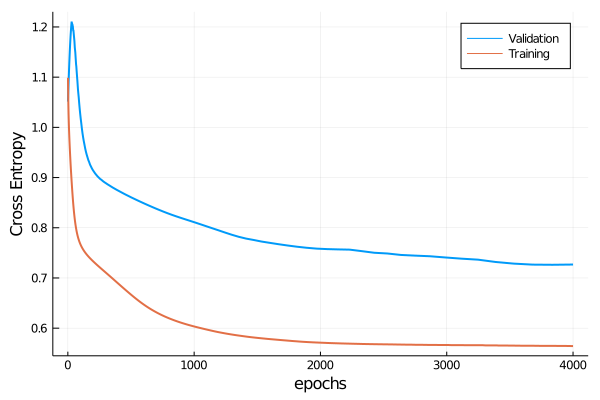

In [88]:
plot(curve.parameter_values,
     curve.measurements,
     xlab=curve.parameter_name,
     ylab="Cross Entropy",
     label="Validation", lw=2)
plot!(Net.report.training_losses, label="Training", lw=2)

In [89]:
best_epochs = curve.parameter_values[argmin(curve.measurements)]

3837

In [101]:
png("Figures/learning_curve_nn_$(best_epochs)epochs_balance")

# Final Results

In [102]:
final_model = NeuralNetworkClassifier(builder=CustomNN(best_n1))

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 23),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @410

In [103]:
final_model.optimiser.eta = lc_model.optimiser.eta = best_eta;
final_model.batch_size = batch_sz
final_model.lambda = best_lambda
final_model.epochs = best_epochs

3837

### Test Performance

In [104]:
Final_Net = machine(final_model, X_stand, y)

Machine{NeuralNetworkClassifier{CustomNN,…}} @626 trained 0 times.
  args: 
    1:	Source @753 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @732 ⏎ `AbstractArray{Multiclass{3},1}`


In [105]:
fit!(Final_Net, rows=train, force=true, verbosity=1)

┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @626.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Optimising neural net:100%[=========================] Time: 0:02:45


Machine{NeuralNetworkClassifier{CustomNN,…}} @626 trained 1 time.
  args: 
    1:	Source @753 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @732 ⏎ `AbstractArray{Multiclass{3},1}`


In [106]:
nn_acc = evaluate!(Final_Net, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:18:31


┌───────────────┬───────────────┬───────────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                        │
├───────────────┼───────────────┼───────────────────────────────────────────────────┤
│ cross_entropy │ 0.661         │ Float32[0.644, 0.663, 0.654, 0.653, 0.675, 0.676] │
│ acc           │ 0.885         │ [0.906, 0.887, 0.889, 0.889, 0.864, 0.872]        │
└───────────────┴───────────────┴───────────────────────────────────────────────────┘
_.per_observation = [[[0.551, 0.551, ..., 0.552], [0.551, 1.55, ..., 0.552], [1.03, 0.592, ..., 0.551], [0.551, 0.574, ..., 0.718], [0.862, 0.552, ..., 0.551], [1.55, 1.48, ..., 1.11]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [107]:
ŷ = MLJ.predict(Final_Net, X_stand[test,:]);

In [108]:
cross_entropy(ŷ, y[test]) |> mean

0.5739536f0

In [109]:
acc(ŷ, y[test])

0.9738766980146291

In [110]:
confusion_matrix(mode.(ŷ), y[test])

┌ Warning: The classes are un-ordered,
│ using order: ["EI", "IE", "N"].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/measures/confusion_matrix.jl:87


              ┌─────────────────────────────────────────┐
              │              Ground Truth               │
┌─────────────┼─────────────┬─────────────┬─────────────┤
│  Predicted  │     EI      │     IE      │      N      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     EI      │     223     │      1      │      4      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     IE      │      3      │     225     │      9      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│      N      │      4      │      4      │     484     │
└─────────────┴─────────────┴─────────────┴─────────────┘


In [111]:
fitted_params(Final_Net)

(chain = Chain(Chain(Dense(60, 23, σ), Dense(23, 3, σ)), softmax),)

In [112]:
report(Final_Net)

(training_losses = Any[1.0741705f0, 1.0588735f0, 1.0457569f0, 1.0344855f0, 1.0247126f0, 1.0161222f0, 1.0084453f0, 1.0014627f0, 0.9949977f0, 0.98891115f0  …  0.5570921f0, 0.5570914f0, 0.55709106f0, 0.5570905f0, 0.5570899f0, 0.5570895f0, 0.5570889f0, 0.5570883f0, 0.5570878f0, 0.5570875f0],)